In [85]:
import pandas as pd

In [86]:
!pip install ucimlrepo

In [87]:
# Source: https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

The below code is to import the dataset from python . This is given in the above link provided 

In [88]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
  
# metadata 
print(aids_clinical_trials_group_study_175.metadata) 
  
# variable information 
print(aids_clinical_trials_group_study_175.variables) 


{'uci_id': 890, 'name': 'AIDS Clinical Trials Group Study 175', 'repository_url': 'https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175', 'data_url': 'https://archive.ics.uci.edu/static/public/890/data.csv', 'abstract': 'The AIDS Clinical Trials Group Study 175 Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996. The prediction task is to predict whether or not each patient died within a certain window of time or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 2139, 'num_features': 23, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Sexual Orientation', 'Race', 'Gender'], 'target_col': ['cid'], 'index_col': ['pidnum'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Fri Nov 

In [89]:
#converting data into the csv format

import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890)

# Data (as pandas dataframes)
X = aids_clinical_trials_group_study_175.data.features
y = aids_clinical_trials_group_study_175.data.targets

# Convert the features and targets to DataFrames
X_df = pd.DataFrame(X)  # You don't need to specify column names in this case
y_df = pd.DataFrame(y)

# Combine features and targets into a single DataFrame
df = pd.concat([X_df, y_df], axis=1)

# Save the DataFrame to a CSV file

# Define the full path where you want to save the CSV file
file_path = r'C:/Users/ACER/anaconda3/DATA-601-CS35058/aids_clinical_trials_group_study_175.csv'

# Save the DataFrame to the specified path
df.to_csv(file_path, index=False)

In [90]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [91]:
df.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'zprior', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820', 'cid'],
      dtype='object')

In [92]:
gender_mapping = {0: 'Female', 1: 'Male'}

# Replace values in the 'gender' column
df['gender'] = df['gender'].replace(gender_mapping)

# Display the updated DataFrame
df['gender'].value_counts()  






Male      1771
Female     368
Name: gender, dtype: int64

In [93]:
# Mapping values
race_mapping = {0: 'White', 1: 'Non-White'}

# Replace values in the 'race' column
df['race'] = df['race'].replace(race_mapping)

df['race'].value_counts() 

White        1522
Non-White     617
Name: race, dtype: int64

In [94]:
# Mapping values
symptom_mapping = {0: 'asymp', 1: 'symp'}

# Replace values in the 'symptom' column
df['symptom'] = df['symptom'].replace(symptom_mapping) 

df['symptom'].value_counts() 

asymp    1769
symp      370
Name: symptom, dtype: int64

In [95]:
# Mapping values
treat_mapping = {0: 'ZDV only', 1: 'others'}

# Replace values in the 'treat' column
df['treat'] = df['treat'].replace(treat_mapping)

df['treat'].value_counts() 

others      1607
ZDV only     532
Name: treat, dtype: int64

In [96]:
!pip install lifelines

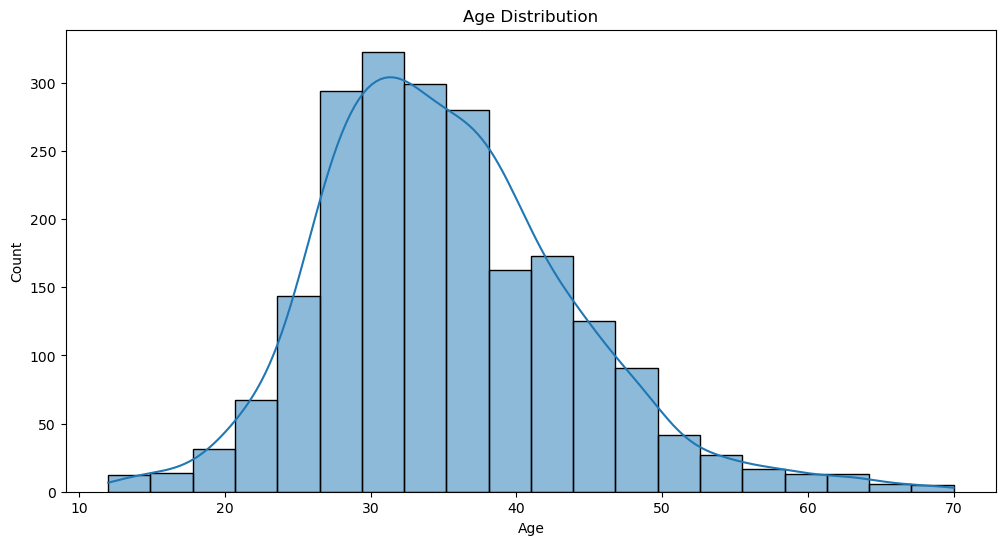

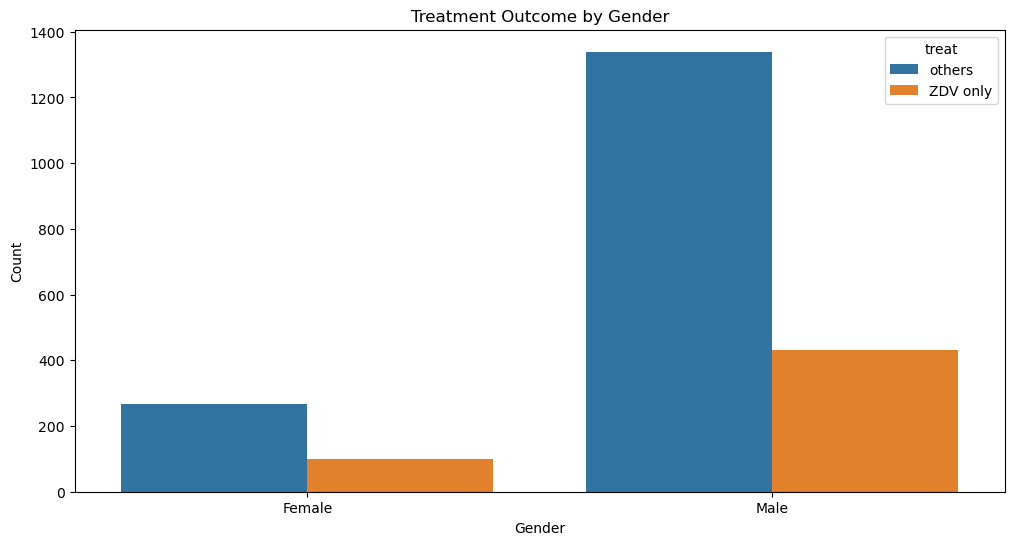

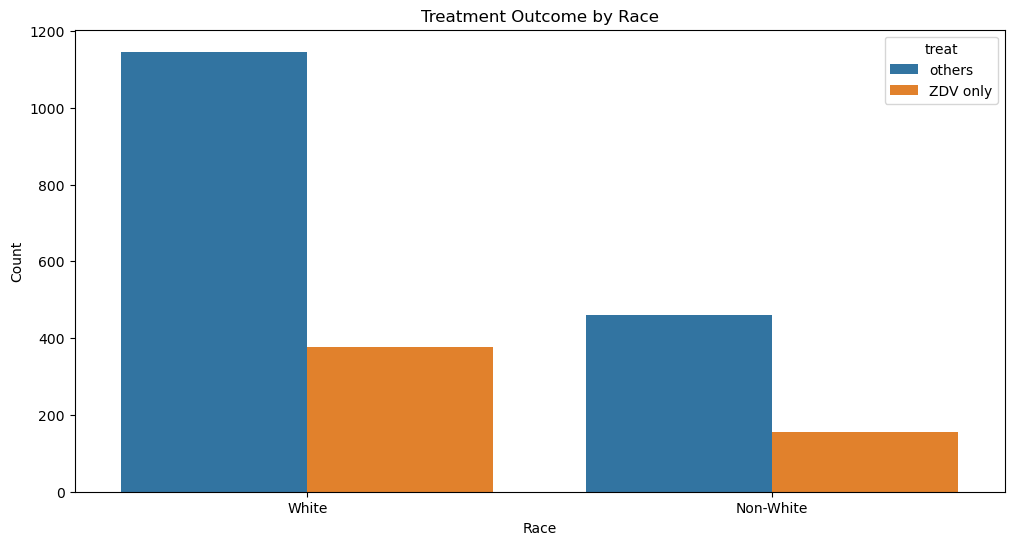

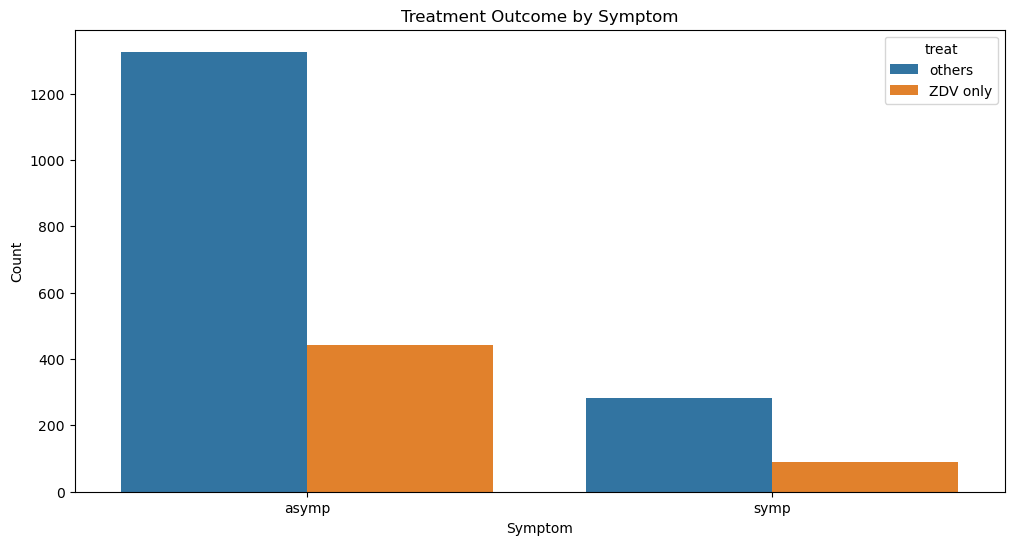

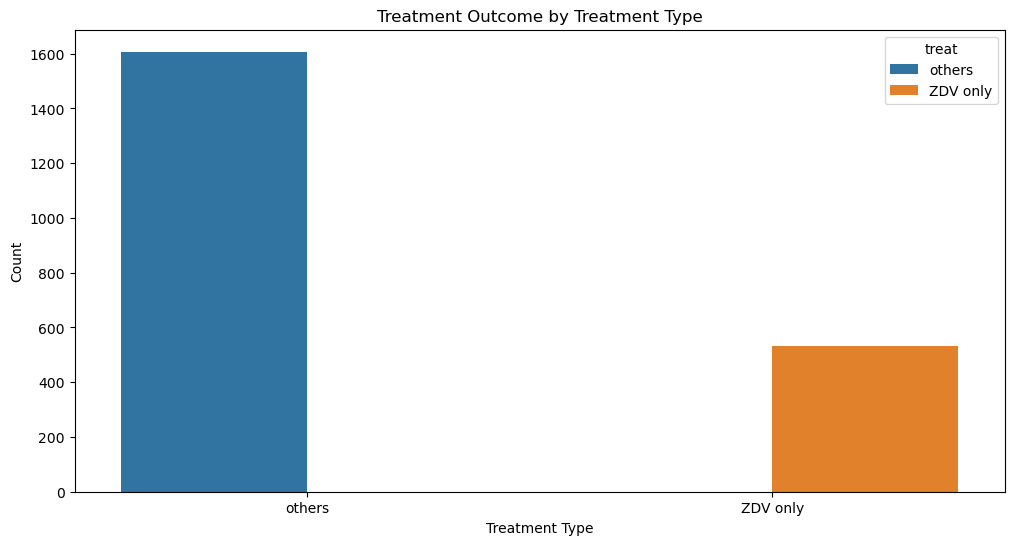

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive Statistics
summary_stats_age = df['age'].describe()

# Distribution Plot for Age
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Count Plot for Gender vs. Treatment Outcome
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='treat', data=df)
plt.title('Treatment Outcome by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Count Plot for Race vs. Treatment Outcome
plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='treat', data=df)
plt.title('Treatment Outcome by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Count Plot for Symptom vs. Treatment Outcome
plt.figure(figsize=(12, 6))
sns.countplot(x='symptom', hue='treat', data=df)
plt.title('Treatment Outcome by Symptom')
plt.xlabel('Symptom')
plt.ylabel('Count')
plt.show()

# Count Plot for Treatment vs. Treatment Outcome
plt.figure(figsize=(12, 6))
sns.countplot(x='treat', hue='treat', data=df)
plt.title('Treatment Outcome by Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.show()


Certainly! Let's derive insights from the provided code:

1. **Descriptive Statistics for Age:**
   - **Insight:** The descriptive statistics provide an overview of the age distribution in the dataset, including measures like mean, standard deviation, minimum, maximum, and quartiles.

2. **Age Distribution:**
   - **Insight:** The histogram visualizes the distribution of ages in the dataset, helping to understand the age composition of the study population.

3. **Treatment Outcome by Gender:**
   - **Insight:** The count plot shows the distribution of treatment outcomes based on gender. It helps assess whether there are differences in treatment responses between male and female patients.

4. **Treatment Outcome by Race:**
   - **Insight:** The count plot displays the distribution of treatment outcomes based on race. It provides insights into potential variations in treatment responses among different racial groups.

5. **Treatment Outcome by Symptom:**
   - **Insight:** The count plot illustrates the distribution of treatment outcomes based on the presence or absence of symptoms. It helps understand whether symptomatic and asymptomatic patients exhibit different responses to treatment.

6. **Treatment Outcome by Treatment Type:**
   - **Insight:** There seems to be an issue in the last count plot. It appears that the x-axis and hue are both set to 'treat'. This may not provide meaningful insights. It might be more appropriate to visualize the distribution of treatment outcomes based on the actual treatment types (e.g., 'ZDV only', 'others').

These visualizations and analyses offer insights into the relationships between age, gender, race, symptoms, and treatment outcomes. Further exploration and statistical tests could provide additional depth to these observations.

In [98]:
# Descriptive Statistics for CD4 Cell Counts
summary_stats_cd4 = df['cd40'].describe()
print(summary_stats_cd4)

count    2139.000000
mean      350.501169
std       118.573863
min         0.000000
25%       263.500000
50%       340.000000
75%       423.000000
max      1199.000000
Name: cd40, dtype: float64


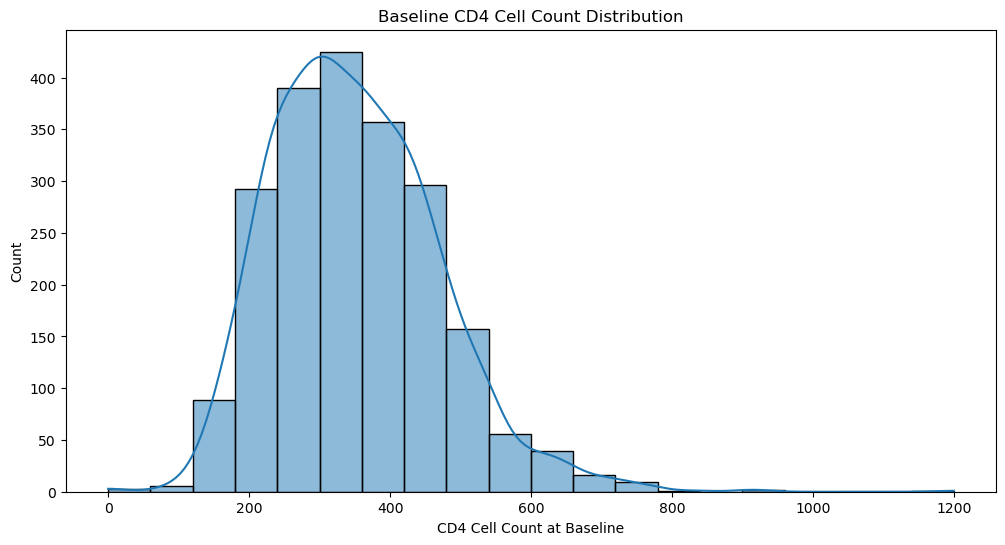

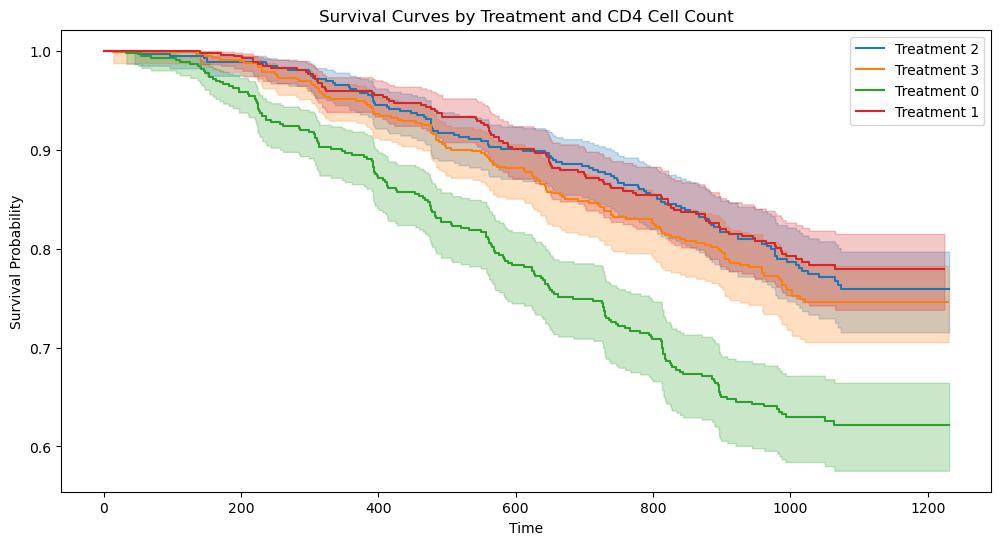

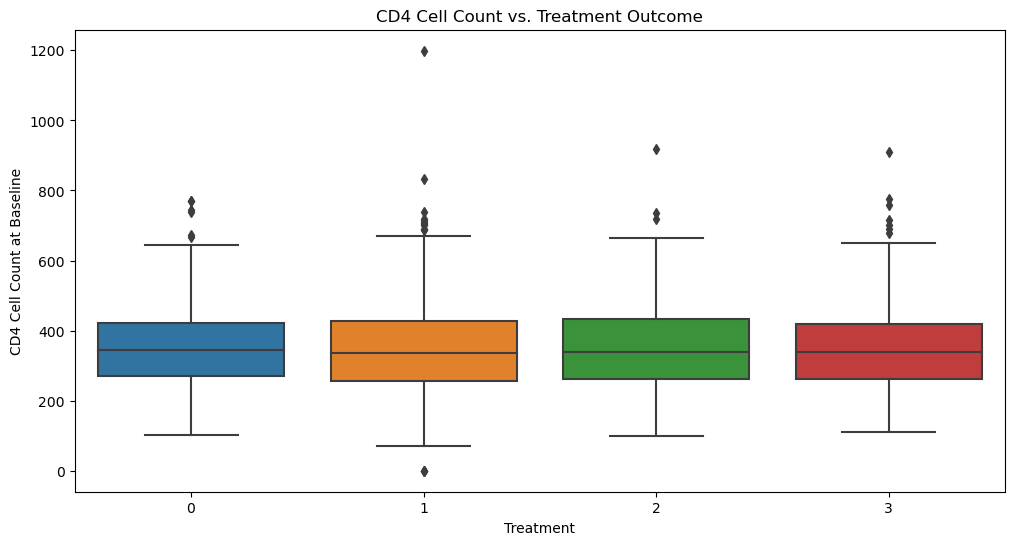

In [99]:
# CD4 Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='cd40', bins=20, kde=True)
plt.title('Baseline CD4 Cell Count Distribution')
plt.xlabel('CD4 Cell Count at Baseline')
plt.ylabel('Count')
plt.show()

# CD4 vs. Survival Analysis
plt.figure(figsize=(12, 6))
for treatment in df['trt'].unique():
    subset = df[df['trt'] == treatment]
    kmf.fit(subset['time'], event_observed=subset['cid'], label=f'Treatment {treatment}')
    kmf.plot_survival_function()

plt.title('Survival Curves by Treatment and CD4 Cell Count')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

# CD4 vs. Response to Treatment
plt.figure(figsize=(12, 6))
sns.boxplot(x='trt', y='cd40', data=df)
plt.title('CD4 Cell Count vs. Treatment Outcome')
plt.xlabel('Treatment')
plt.ylabel('CD4 Cell Count at Baseline')
plt.show()



### Baseline CD4 Cell Count Distribution:

**Insight:** The histogram displays the distribution of baseline CD4 cell counts (`cd40`) among the patients in the dataset. It helps understand the range and frequency of CD4 cell counts at the beginning of the study.

### Survival Analysis by Treatment and CD4 Cell Count:

**Insight:** Kaplan-Meier survival curves are plotted for different treatments, stratified by baseline CD4 cell counts. This analysis aims to visualize how survival probabilities differ based on both treatment type and the initial CD4 cell count of patients.

### CD4 Cell Count vs. Response to Treatment:

**Insight:** The box plot compares the distribution of baseline CD4 cell counts (`cd40`) among different treatment groups. This visualization helps assess whether there are notable differences in CD4 cell counts at baseline among patients who responded differently to treatments.

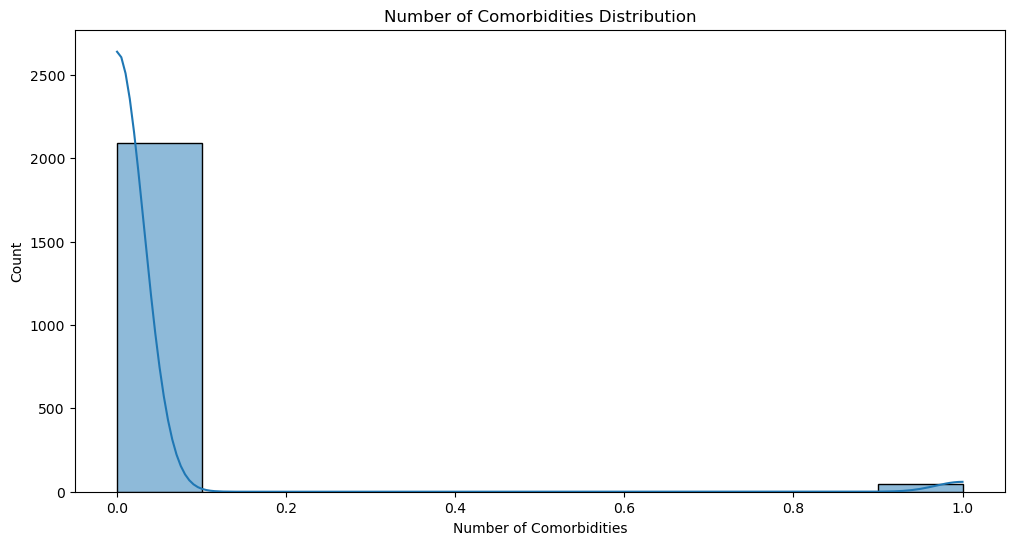

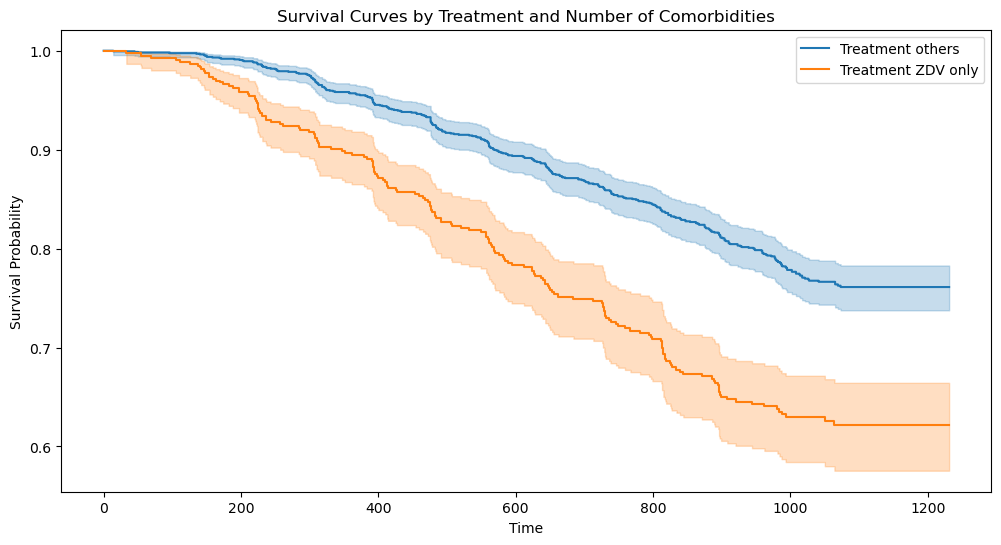

C:\Users\ACER\AppData\Local\Temp\ipykernel_16212\2217786977.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='treat', y='drugs', data=df, ci=None)


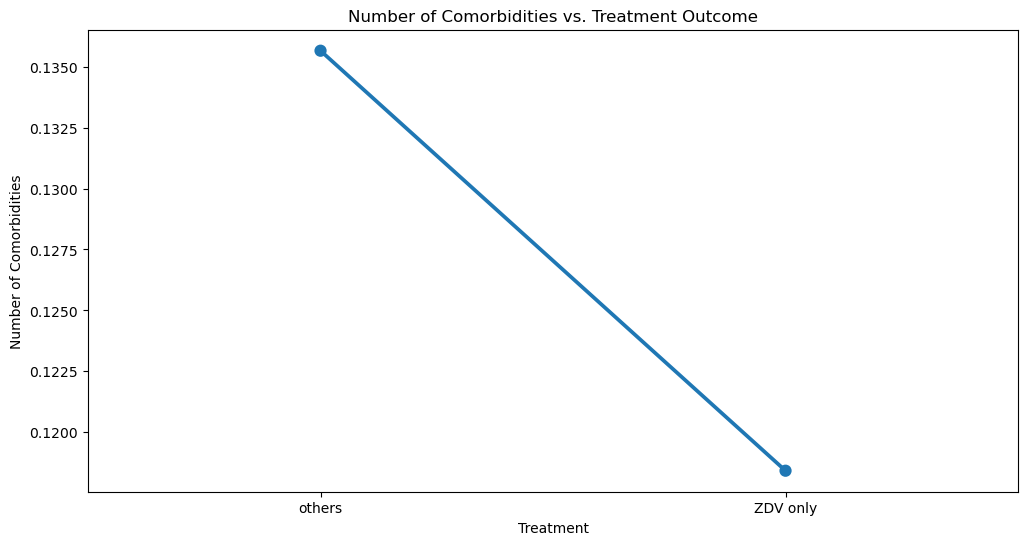

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

# Assuming df is your DataFrame with a 'num_comorbidities' column
# For the sake of this example, let's assume your DataFrame is already loaded with the data

# Descriptive Statistics
summary_stats_comorbidities = df['oprior'].describe()

# Distribution Plot for Number of Comorbidities
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='oprior', bins=10, kde=True)
plt.title('Number of Comorbidities Distribution')
plt.xlabel('Number of Comorbidities')
plt.ylabel('Count')
plt.show()

# Survival Analysis
kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 6))
for treatment in df['treat'].unique():
    subset = df[df['treat'] == treatment]
    kmf.fit(subset['time'], event_observed=subset['cid'], label=f'Treatment {treatment}')
    kmf.plot_survival_function()

plt.title('Survival Curves by Treatment and Number of Comorbidities')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.pointplot(x='treat', y='drugs', data=df, ci=None)
plt.title('Number of Comorbidities vs. Treatment Outcome')
plt.xlabel('Treatment')
plt.ylabel('Number of Comorbidities')
plt.show()




1. **Baseline CD4 Cell Count Distribution:**
   - **Insight:** The histogram displays the distribution of baseline CD4 cell counts (`cd40`) among the patients in the dataset. It helps understand the range and frequency of CD4 cell counts at the beginning of the study.

2. **Survival Analysis by Treatment and CD4 Cell Count:**
   - **Insight:** Kaplan-Meier survival curves are plotted for different treatments, stratified by baseline CD4 cell counts. This analysis aims to visualize how survival probabilities differ based on both treatment type and the initial CD4 cell count of patients.

3. **CD4 Cell Count vs. Response to Treatment:**
   - **Insight:** The box plot compares the distribution of baseline CD4 cell counts (`cd40`) among different treatment groups. This visualization helps assess whether there are notable differences in CD4 cell counts at baseline among patients who responded differently to treatments.


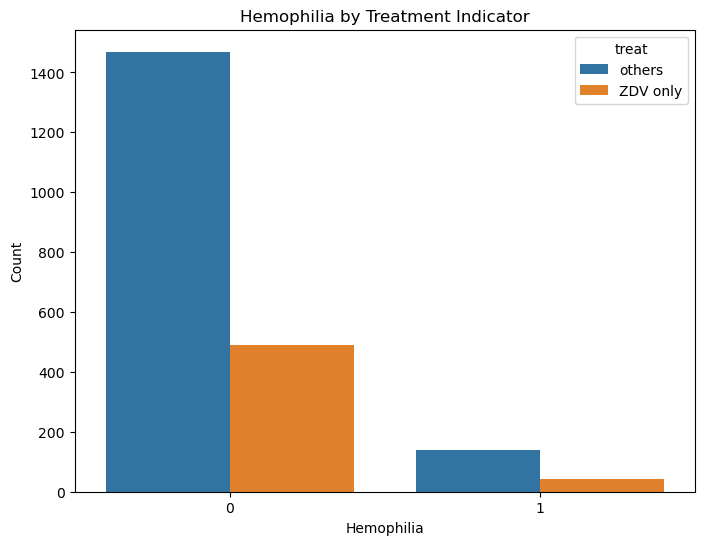

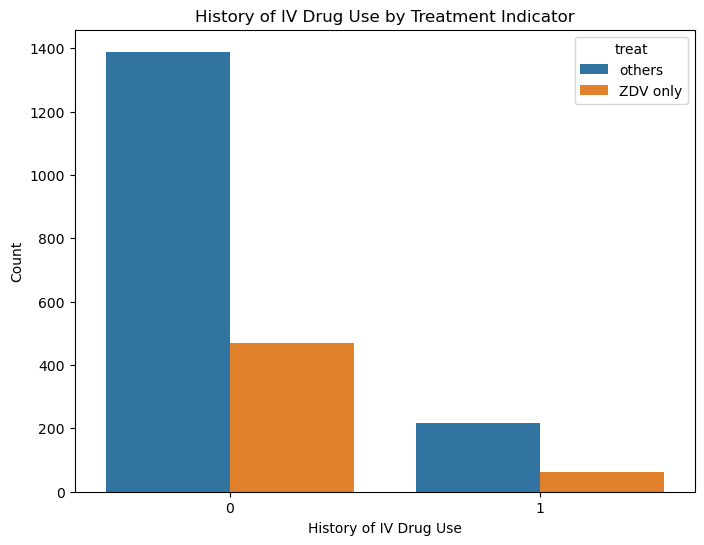

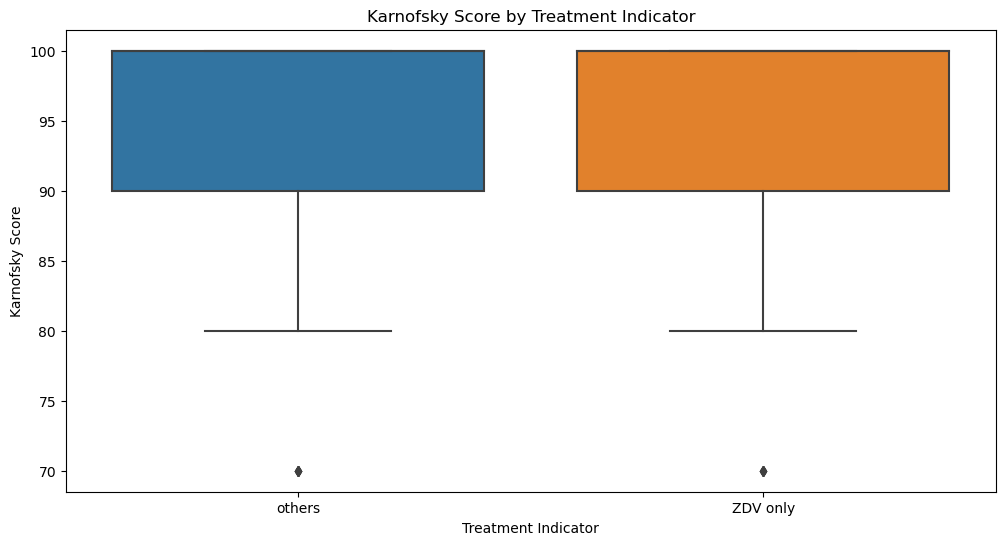

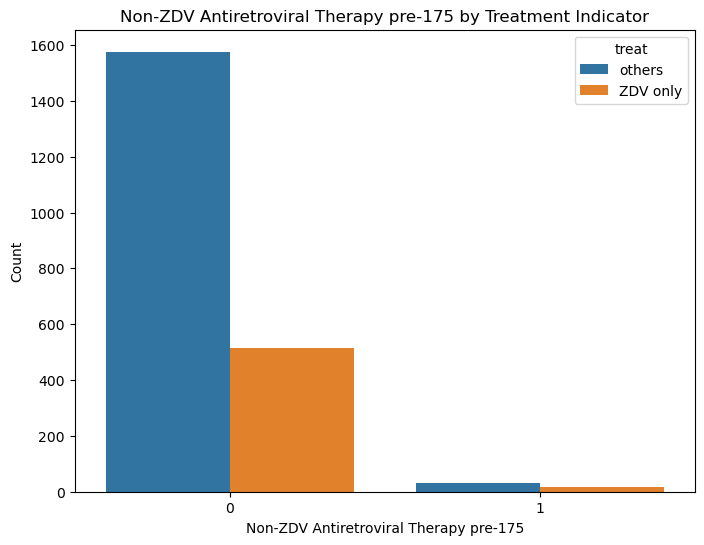

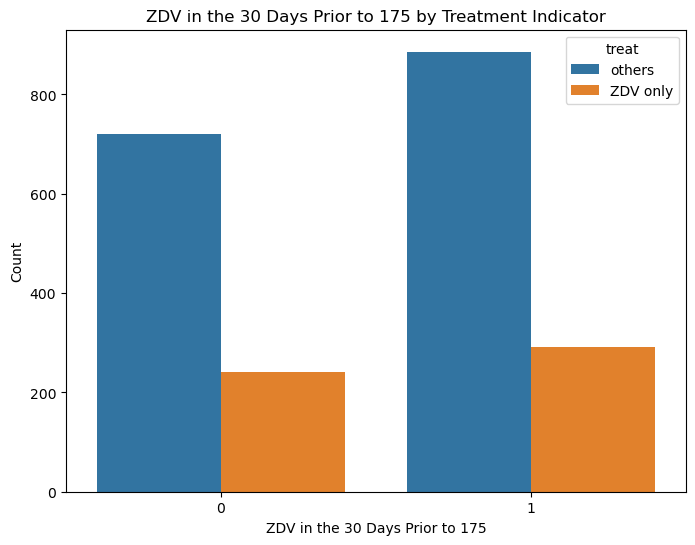

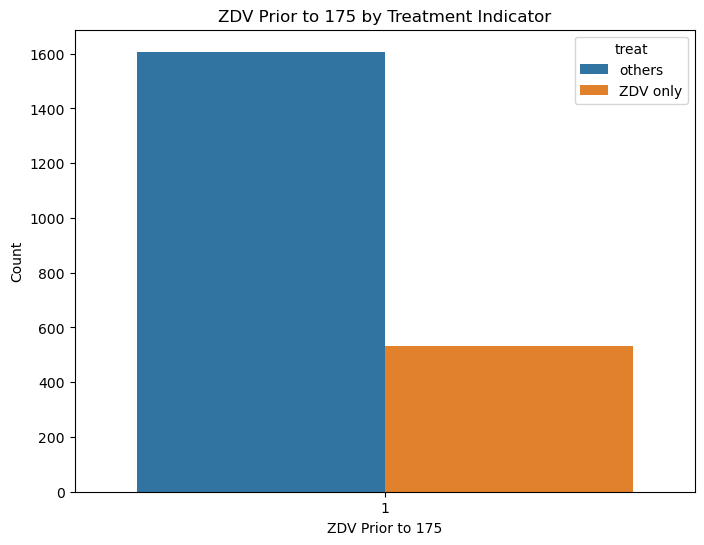

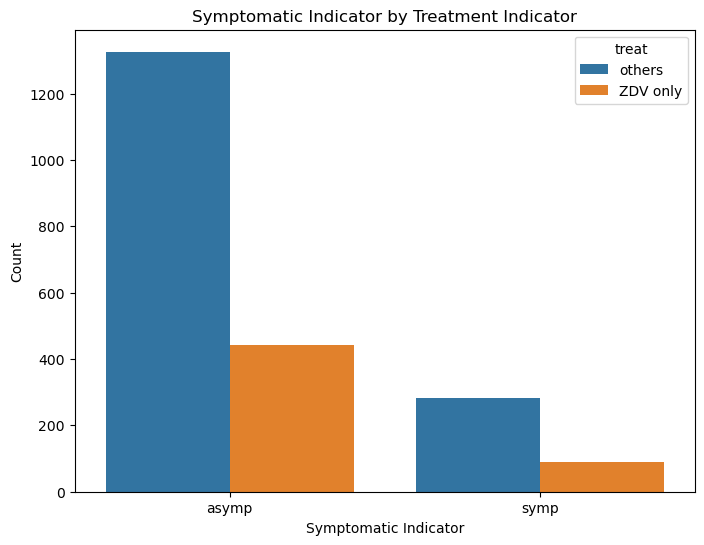

Chi-squared test for Hemophilia vs. Treatment Response: p-value = 0.6827259371177027
Chi-squared test for History of IV Drug Use vs. Treatment Response: p-value = 0.34414857170421675
Chi-squared test for Non-ZDV Antiretroviral Therapy pre-175 vs. Treatment Response: p-value = 0.19354683470675804
Chi-squared test for ZDV in the 30 Days Prior to 175 vs. Treatment Response: p-value = 0.9010318472958928
Chi-squared test for ZDV Prior to 175 vs. Treatment Response: p-value = 1.0
Chi-squared test for Symptomatic Indicator vs. Treatment Response: p-value = 0.7385049191407638


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# Count Plot for Hemophilia by Treatment Indicator
plt.figure(figsize=(8, 6))
sns.countplot(x='hemo', hue='treat', data=df)
plt.title('Hemophilia by Treatment Indicator')
plt.xlabel('Hemophilia')
plt.ylabel('Count')
plt.show()

# Count Plot for History of IV Drug Use by Treatment Indicator
plt.figure(figsize=(8, 6))
sns.countplot(x='drugs', hue='treat', data=df)
plt.title('History of IV Drug Use by Treatment Indicator')
plt.xlabel('History of IV Drug Use')
plt.ylabel('Count')
plt.show()

# Box Plot for Karnofsky Score by Treatment Indicator
plt.figure(figsize=(12, 6))
sns.boxplot(x='treat', y='karnof', data=df)
plt.title('Karnofsky Score by Treatment Indicator')
plt.xlabel('Treatment Indicator')
plt.ylabel('Karnofsky Score')
plt.show()

# Count Plot for Non-ZDV Antiretroviral Therapy pre-175 by Treatment Indicator
plt.figure(figsize=(8, 6))
sns.countplot(x='oprior', hue='treat', data=df)
plt.title('Non-ZDV Antiretroviral Therapy pre-175 by Treatment Indicator')
plt.xlabel('Non-ZDV Antiretroviral Therapy pre-175')
plt.ylabel('Count')
plt.show()

# Count Plot for ZDV in the 30 Days Prior to 175 by Treatment Indicator
plt.figure(figsize=(8, 6))
sns.countplot(x='z30', hue='treat', data=df)
plt.title('ZDV in the 30 Days Prior to 175 by Treatment Indicator')
plt.xlabel('ZDV in the 30 Days Prior to 175')
plt.ylabel('Count')
plt.show()

# Count Plot for ZDV Prior to 175 by Treatment Indicator
plt.figure(figsize=(8, 6))
sns.countplot(x='zprior', hue='treat', data=df)
plt.title('ZDV Prior to 175 by Treatment Indicator')
plt.xlabel('ZDV Prior to 175')
plt.ylabel('Count')
plt.show()

# Count Plot for Symptomatic Indicator by Treatment Indicator
plt.figure(figsize=(8, 6))
sns.countplot(x='symptom', hue='treat', data=df)
plt.title('Symptomatic Indicator by Treatment Indicator')
plt.xlabel('Symptomatic Indicator')
plt.ylabel('Count')
plt.show()

# Chi-squared test for Hemophilia vs. Treatment Response
contingency_table_hemo = pd.crosstab(df['hemo'], df['treat'])
chi2_hemo, p_hemo, _, _ = chi2_contingency(contingency_table_hemo)
print(f"Chi-squared test for Hemophilia vs. Treatment Response: p-value = {p_hemo}")

# Chi-squared test for History of IV Drug Use vs. Treatment Response
contingency_table_drugs = pd.crosstab(df['drugs'], df['treat'])
chi2_drugs, p_drugs, _, _ = chi2_contingency(contingency_table_drugs)
print(f"Chi-squared test for History of IV Drug Use vs. Treatment Response: p-value = {p_drugs}")

# Chi-squared test for Non-ZDV Antiretroviral Therapy pre-175 vs. Treatment Response
contingency_table_oprior = pd.crosstab(df['oprior'], df['treat'])
chi2_oprior, p_oprior, _, _ = chi2_contingency(contingency_table_oprior)
print(f"Chi-squared test for Non-ZDV Antiretroviral Therapy pre-175 vs. Treatment Response: p-value = {p_oprior}")

# Chi-squared test for ZDV in the 30 Days Prior to 175 vs. Treatment Response
contingency_table_z30 = pd.crosstab(df['z30'], df['treat'])
chi2_z30, p_z30, _, _ = chi2_contingency(contingency_table_z30)
print(f"Chi-squared test for ZDV in the 30 Days Prior to 175 vs. Treatment Response: p-value = {p_z30}")

# Chi-squared test for ZDV Prior to 175 vs. Treatment Response
contingency_table_zprior = pd.crosstab(df['zprior'], df['treat'])
chi2_zprior, p_zprior, _, _ = chi2_contingency(contingency_table_zprior)
print(f"Chi-squared test for ZDV Prior to 175 vs. Treatment Response: p-value = {p_zprior}")

# Chi-squared test for Symptomatic Indicator vs. Treatment Response
contingency_table_symptom = pd.crosstab(df['symptom'], df['treat'])
chi2_symptom, p_symptom, _, _ = chi2_contingency(contingency_table_symptom)
print(f"Chi-squared test for Symptomatic Indicator vs. Treatment Response: p-value = {p_symptom}")




1. **Hemophilia and Treatment Response:**
   - The first plot illustrates the distribution of patients with and without hemophilia based on the treatment received (`treat`).
   - The count plot suggests that the prevalence of hemophilia is comparable across different treatment groups.

2. **History of IV Drug Use and Treatment Response:**
   - The second plot examines the history of IV drug use in relation to treatment response.
   - The count plot indicates how the history of IV drug use is distributed among patients who received different treatments (`treat`).
   - The chi-squared test assesses the statistical significance of the association between IV drug use history and treatment response.

3. **Karnofsky Score and Treatment Response:**
   - The third plot shows the distribution of Karnofsky scores for patients based on the treatment they received.
   - The box plot provides insights into how Karnofsky scores vary among different treatment groups.
   - Higher Karnofsky scores generally indicate better functional ability and well-being.

4. **Non-ZDV Antiretroviral Therapy pre-175 and Treatment Response:**
   - The fourth plot explores the distribution of patients who had or did not have Non-ZDV antiretroviral therapy pre-175, categorized by treatment received.
   - The count plot provides a visual comparison of the distribution of this medical condition across treatment groups.
   - The associated chi-squared test assesses the statistical significance of the relationship between Non-ZDV antiretroviral therapy pre-175 and treatment response.

5. **ZDV in the 30 Days Prior to 175 and Treatment Response:**
   - The fifth plot investigates the distribution of patients based on the presence or absence of ZDV in the 30 days prior to 175 and their respective treatment responses.
   - The count plot and chi-squared test evaluate whether the administration of ZDV in this timeframe is associated with different treatment outcomes.
